# TRABAJO Parte 2: AIA_2024-2025

# Nombre y DNI del alumno/a 1: GUILLERMO BLANCO DÍAZ 31020304C
# Nombre y DNI del alumno/a 2:

# Transfer Learning con CNNs - Dataset: Flowers

La idea de este trabajo es familiarizarnos con dos situaciones muy habituales en la actividad real de un "Machine Learning Engineer":

1.   En primer lugar, con una de las técnicas más potentes asociadas con las redes neuronales: el **Transfer Learning**. Dado que las redes neuronales, para resolver un problema, capturan en su estructura de capas y pesos una representación jerárquica del problema.
Entonces..., ¿por que no aprovechar ese conocimiento obtenido, para resolver otro problema diferente?

2.  En segundo lugar, con la **busqueda de información sobre conceptos nuevos**. En este caso, los dos primeros modelos a implementar los hemos trabajado en clase. No así el Transfer Learning, y por tanto, debereis buscar vosotros mismos como hacer lo que se pide para el Modelo 3. Consultar en blogs, web y tutoriales es algo común en el día a día de alguien que quiere profundizar en el ML y, para ello, existen infinidad de fuentes. A modo de ejemplo, una fuente para profundizar en el Transfer Learning con redes convolucionales es: https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/

En este trabajo vamos intentar resolver un problema de clasificación sobre un dataset propuesto por Tensorflow en 2019 conocido como "flowers". Este conjunto está formado por 3670 imágenes de flores pertenecientes a 5 clases diferentes. Para ello implementaremos 3 modelos:

*   Modelo 1: implementación de una CNN básica.
*   Modelo 2: es una evolución del modelo anterior, aplicando técnicas que reduzcan el overfitting.
*   Modelo 3: rompemos la barrera de tener que seguir complicando nuestro modelo y se pide aplicar transfer learning utilizando un pre-trained model.





# a) Carga de datos

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import pathlib
import os
import glob
import shutil
tf.__version__

'2.18.0'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Descargamos el dataset que pone a nuestra disposición Tensorflow.

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True,
                                   )

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Tras completar la descarga, debemos tener la siguiente estructura de directorios:  

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>~/.keras/datasets/flower_photos_extracted/flower_photos</b>
|__ <b>daisy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
</pre>

Desgraciadamente, para este dataset, Tensorflow no nos proporciona la estructura de directorios necesaria de train y de validación. Por lo que debemos proceder del siguiente modo:

* Crear una carpeta `train` y de `val`, cada una de ellas debe contener a su vez, cinco subdirectorios: uno para cada clase de flor.
* Moveremos las imágenes de las carpetas originales a estas nuevas carpetas. De modo que el 80% de las imágenes vayan al conjunto de train y el 20% restante al de validación.
* La estructura final de directorios debe ser la siguiente:

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>~/.keras/datasets/flower_photos_extracted/flower_photos</b>
|__ <b>train</b>
    |______ <b>daisy</b>: [12.jpg, 28.jpg, 31.jpg ....]
    |______ <b>dandelion</b>: [41.jpg, 22.jpg, 35.jpg ....]
    |______ <b>roses</b>: [121.jpg, 92.jpg, 38.jpg ....]
    |______ <b>sunflowers</b>: [93.jpg, 23.jpg, 83.jpg ....]
    |______ <b>tulips</b>: [109.jpg, 267.jpg, 93.jpg ....]
 |__ <b>val</b>
    |______ <b>daisy</b>: [507.jpg, 508.jpg, 509.jpg ....]
    |______ <b>dandelion</b>: [719.jpg, 720.jpg, 721.jpg ....]
    |______ <b>roses</b>: [514.jpg, 515.jpg, 516.jpg ....]
    |______ <b>sunflowers</b>: [560.jpg, 561.jpg, 562.jpg .....]
    |______ <b>tulips</b>: [640.jpg, 641.jpg, 642.jpg ....]
</pre>

Creamos una lista con el nombre de las 5 clases. En castellano sería: margaritas, diente de león, rosas, girasoles y tulipanes.

In [ ]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

Creemos la estructura de directorios necesaria:

In [ ]:
base_dir = os.path.expanduser("~/.keras/datasets/flower_photos_extracted/flower_photos/")

Preparamos variables con las rutas de los diferentes directorios a crear:

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

daisy_dir = os.path.join(train_dir, 'daisy')
dandelion_dir = os.path.join(train_dir, 'dandelion')
roses_dir = os.path.join(train_dir, 'roses')
sunflowers_dir = os.path.join(train_dir, 'sunflowers')
tulips_dir = os.path.join(train_dir, 'tulips')

In [ ]:
SPLIT_RATIO=0.8

for cl in classes:
    # path de las imagenes de la clase cl
    img_path = os.path.join(base_dir, cl)

    # obtenemos la lista de todas las imagenes
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Imagenes".format(cl, len(images)))

    # determinamos cuantas imagenes son el 80%
    num_train = int(round(len(images)*SPLIT_RATIO))

    # separamos las imagenes en dos listas
    train, val = images[:num_train], images[num_train:]

    # creamos la carpeta de train/clase y val/clase
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
        os.makedirs(os.path.join(base_dir, 'train', cl))
    else:
        shutil.rmtree(os.path.join(base_dir, 'train', cl))

    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
        os.makedirs(os.path.join(base_dir, 'val', cl))
    else:
        shutil.rmtree(os.path.join(base_dir, 'val', cl))

    for t in train:
        shutil.move(t, os.path.join(base_dir, 'train', cl))

    for v in val:
        shutil.move(v, os.path.join(base_dir, 'val', cl))


roses: 641 Imagenes
daisy: 633 Imagenes
dandelion: 898 Imagenes
sunflowers: 699 Imagenes
tulips: 799 Imagenes


**Tarea 1: Muestre el nombre de dos ficheros cualquiera en alguna de esas rutas**

In [ ]:
# Ruta donde está el dataset extraído
base_dir = os.path.expanduser("~/.keras/datasets/flower_photos_extracted/flower_photos/train")

# Ejemplo para la clase "daisy"
daisy_dir = os.path.join(base_dir, "daisy")
train_daisy_files = os.listdir(daisy_dir)

print("Dos archivos de la clase 'daisy':")
print(train_daisy_files[:2])


Dos archivos de la clase 'daisy':
['391364011_5beaaa1ae2_m.jpg', '5997702776_c7bc37aa6b_n.jpg']


Es decir, la clase a la que pertenece cada imagen no viene dada por el nombre del fichero sino por el directorio en el que se encuentra almacenada.

**Tarea 2: Muestra el número de imágenes de train que tenemos de cada clase**

In [ ]:
# Mostrar cuántas imágenes hay por clase en el conjunto de entrenamiento
for cl in classes:
    class_path = os.path.join(train_dir, cl)
    n_images = len(glob.glob(os.path.join(class_path, '*.jpg')))
    print(f"Clase '{cl}': {n_images} imágenes en train")

Clase 'roses': 513 imágenes en train
Clase 'daisy': 506 imágenes en train
Clase 'dandelion': 718 imágenes en train
Clase 'sunflowers': 559 imágenes en train
Clase 'tulips': 639 imágenes en train


# b) Visualización del dataset

**Tarea 3: Muestra 3 imágenes de cada una de las clases, el título de la imagen será el shape del array de numpy asociado a la imagen**

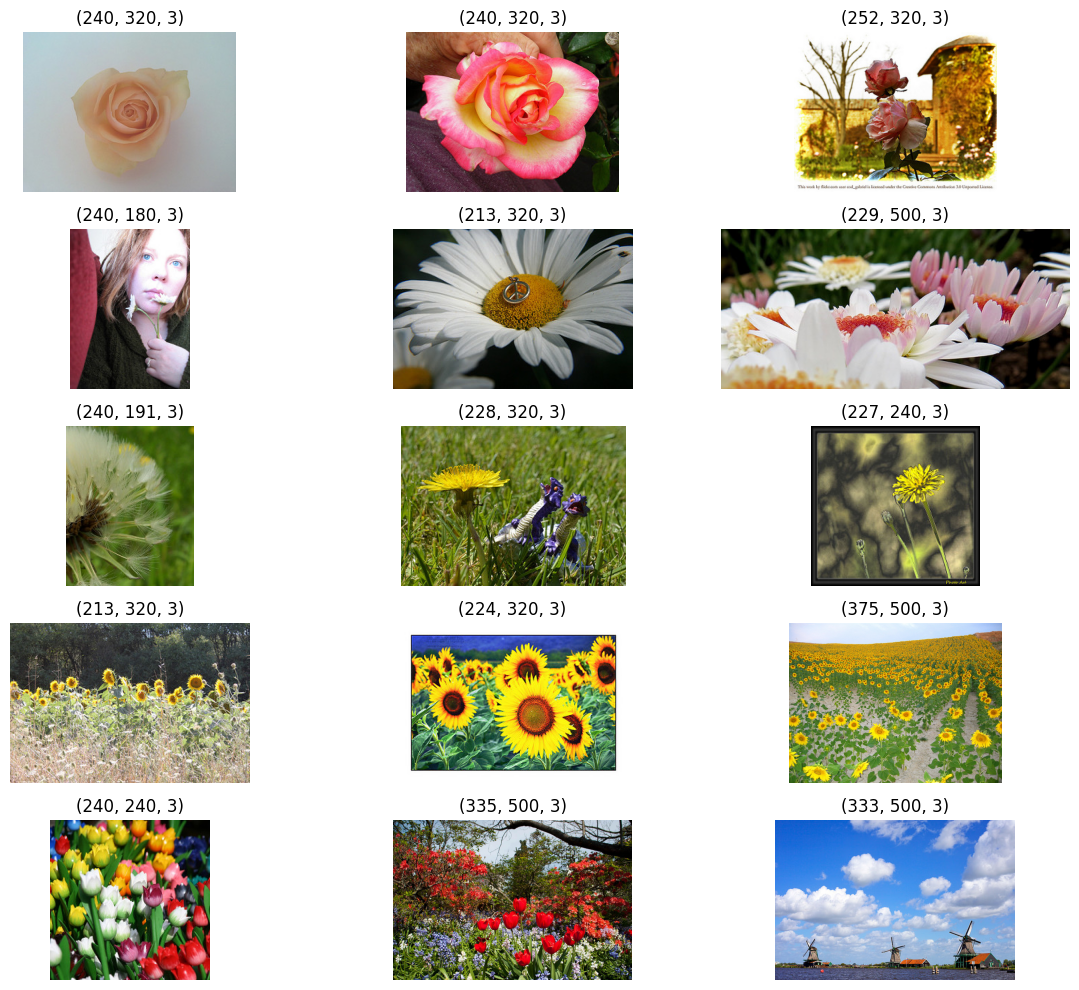

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Tamaño de la figura
plt.figure(figsize=(12, 10))

# Iterar por clases
for i, cl in enumerate(classes):
    class_dir = os.path.join(train_dir, cl)
    img_files = glob.glob(os.path.join(class_dir, "*.jpg"))

    # Tomamos las 3 primeras imágenes
    for j in range(3):
        img = mpimg.imread(img_files[j])
        ax = plt.subplot(len(classes), 3, i * 3 + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(str(img.shape))

plt.tight_layout()
plt.show()

# c) Modelo 1: CNN básica (objetivo: accuracy_valid > 60%)


Implemente una red convolucional para resolver el problema de clasificación. Para ello se sugiere una CNN con 3 capas convolucionales + pooling con la siguiente estructura:

Bloque de procesamiento de imagen:
1.   32 kernels -> 64 kernels -> 96 kernels
2.   kernels de 3x3.
3.   Stride = 1 y padding = SI.
4.   Función de activación ReLU.
5.   Maxpooling de 2x2 con stride clásico de 2 pixeles.
6.   Igualamos el tamaño de todas las imágenes a 150 x 150.

Bloque de decisión:
7.   Capa densa de 512 neuronas.
8.   Capa densa de salida.

**Tarea 4: Define un modelo con la estructura anterior**



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

IMG_HEIGHT = 150
IMG_WIDTH = 150
CHANNELS = 3 # RGB
NUM_CLASSES = len(classes) # 5 clases de flores

model_1 = Sequential([
    # Primera capa convolucional y pooling
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Segunda capa convolucional y pooling
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Tercera capa convolucional y pooling
    Conv2D(96, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Aplanar para la capa densa
    Flatten(),

    # Capas densas
    Dense(512, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax') # Softmax para clasificación multiclase
])


**Tarea 5: Indica el shape de la imagen antes y después de cada capa de la red. Explica cómo has obtenido dichos valores**

|Capa| Shape a la entrada| Operacion de la capa| Shape a la salida|#parámetros
|:-|:-:|:-:|:-:|:-:|
|Conv_1|(None, 150, 150, 3)|32 kernels 3x3, padding='same'|(None, 150, 150, 32)|(3×3×3+1)×32=896
|Pool_1|(None, 150, 150, 32)|MaxPool 2x2, stride 2|(None, 75, 75, 32)|0
|Conv_2|(None, 75, 75, 32)|64 kernels 3x3, padding='same'|(None, 75, 75, 64)|(3×3×32+1)×64=18496
|Pool_2|(None, 75, 75, 64)|MaxPool 2x2, stride 2|(None, 37, 37, 64)|0
|Conv_3|(None, 37, 37, 64)|96 kernels 3x3, padding='same'|(None, 37, 37, 96)|(3×3×64+1)×96=55392
|Pool_3|(None, 37, 37, 96)|MaxPool 2x2, stride 2|(None, 18, 18, 96)|0
|flatten|(None, 18, 18, 96)|Aplanar 18 * 18 * 96|(None, 31104)|0
|densa_1|(None, 31104)|512 neuronas|(None, 512)|(31104+1)×512=15925248
|Output|(None, 512)|5 neuronas (para 5 clases)|(None, 5)|(512+1)×5=2565





**Tarea 6: Compara el resultado con un summary() del modelo**


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 31104)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    15,925,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,003,109 (61.05 MB)

 Trainable params: 16,003,109 (61.05 MB)

 Non-trainable params: 0 (0.00 B)

**Tarea 7: Entrena el modelo de manera que obtenga un accuracy (sobre el conjunto de validación) > 60%.**

* Utilice el optimizador que considere más adecuado.
*   Recuerda que si no se realiza conversión a One-Hot de la etiqueta a predecir, debes utilizar como función de error `SparseCategoricalCrossentropy` (este es el procedimiento que hemos usado en clase).
*   Considera un learning rate en el entorno de 0.001.
*   En el caso de los generators utiliza `class_mode='sparse'`.
*   Puedes utilizar p.e. un `batch_size = 100`.

Configuramos el motor de aprendizaje, el objetivo a minimizar y el criterio de evaluacion del modelo

In [ ]:
model_1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Generamos los datos de entrenamiento y validacion

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# normalizamos los valores de los píxeles de las imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

Configuramos los generadores de entrenamiento  validacion para cargar imagenes directamente desde un directorio

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,                        #Ruta del directorio
        target_size=(150, 150),
        batch_size=100,
        class_mode='sparse')              #Las etiquetas de clase para cada imagen seran numeros enteros

validation_generator = validation_datagen.flow_from_directory(
        val_dir,                          #Ruta del directorio
        target_size=(150, 150),
        batch_size=100,
        class_mode='sparse')              #Las etiquetas de clase para cada imagen seran numeros enteros

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [ ]:
# Calculamos el numero de pasos que se realizaran en cada epoca de entrenamiento y validacion
# train_generator.n -> Numero total de muestras del conjunto de entrenamiento
# train_generator.batch_size -> Es el tamaño del lote (100 en este caso)
# steps_per_epoch -> numero de lotes del train_generator que el modelo procesara
# antes de considerar que una epoca ha terminado
# validation_steps -> similar a steps_per_epoch pero para el conjunto de validacion
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

# entrenamos el modelo
history = model_1.fit(
    train_generator,                            # generador de datos
    steps_per_epoch=steps_per_epoch,            # pasos por epoca
    epochs=15,                                  # numero de epocas
    validation_data=validation_generator,       # se le proporciona el generador de datos de validacion
                                                # para evaluar su rendimiento en datos
    validation_steps=validation_steps,          # pasos por epoca de validacion
    verbose=2                                   # controla la cantidad de informacion que se imprime
)

Epoch 1/15
29/29 - 19s - 669ms/step - accuracy: 0.3577 - loss: 1.5272 - val_accuracy: 0.4814 - val_loss: 1.2566
Epoch 2/15
29/29 - 1s - 46ms/step - accuracy: 0.4900 - loss: 1.2773 - val_accuracy: 0.4800 - val_loss: 1.1675
Epoch 3/15
29/29 - 10s - 360ms/step - accuracy: 0.5552 - loss: 1.0908 - val_accuracy: 0.5743 - val_loss: 1.0573
Epoch 4/15
29/29 - 1s - 47ms/step - accuracy: 0.6000 - loss: 0.9750 - val_accuracy: 0.5586 - val_loss: 1.0541
Epoch 5/15
29/29 - 7s - 235ms/step - accuracy: 0.6325 - loss: 0.9358 - val_accuracy: 0.6400 - val_loss: 0.9323
Epoch 6/15
29/29 - 2s - 52ms/step - accuracy: 0.7500 - loss: 0.7647 - val_accuracy: 0.6243 - val_loss: 0.9574
Epoch 7/15
29/29 - 10s - 347ms/step - accuracy: 0.6832 - loss: 0.8174 - val_accuracy: 0.6186 - val_loss: 0.9566
Epoch 8/15
29/29 - 1s - 50ms/step - accuracy: 0.7100 - loss: 0.8087 - val_accuracy: 0.6529 - val_loss: 0.8987
Epoch 9/15
29/29 - 7s - 245ms/step - accuracy: 0.7503 - loss: 0.6887 - val_accuracy: 0.6500 - val_loss: 0.9054
Ep

**Tarea 8: Muestra la evolución de la función de error (train y valid) durante el entrenamiento.Explica que problema presenta el modelo que hemos entrenado.**

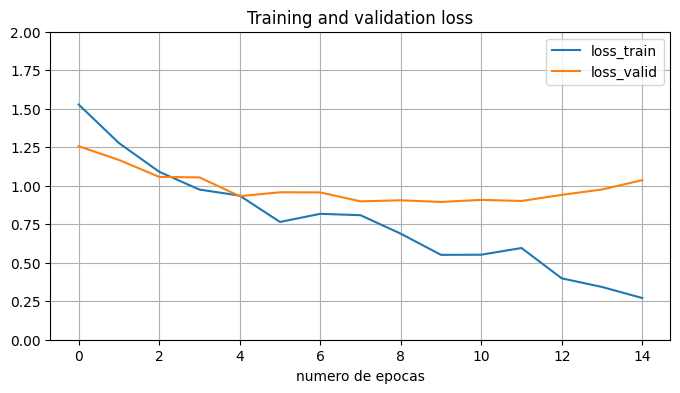

In [ ]:
pd.DataFrame({'loss_train': history.history['loss'],
              'loss_valid': history.history['val_loss']}).plot(figsize=(8,4))

plt.grid(True)
plt.ylim(0,2)
plt.xlabel('numero de epocas')
plt.title('Training and validation loss');

Ésta gráfica muestra un claro indicio de overfitting. Podemos observar como la función de error en entrenamiento baja constantemente hasta valores muy bajos mientras que la función de error de validación comienza bajando en las primeras épocas pero, a partir de las épocas 7-8, empieza a estancarse y luego incluso a subir.

Por tanto el problema que presenta este modelo es que si dejamos que siga entrenando todas las épocas al final acabará adaptándose y memorizando las imágenes del entrenamiento y por ello su rendimiento empeorará. Para combatir este problema podemos aplicar varias técnicas: Early stoping, data augmentation, dropout, etc.

# d) Modelo 2: reducción del overfitting (objetivo: accuracy_valid > 70%)

Para mejorar el accuracy del modelo, vamos a incorporar las dos técnicas más habituales de reducción del overfitting:

    * drop-out
    * data augmentation
    

**Tarea 9: Explica en que consisten y qué utilidad tienen para nuestro problema**





**Dropout**


*   **¿En qué consiste?**
El Dropout es una técnica de regularización que consiste en "desactivar" aleatoriamente un porcentaje de neuronas (y sus conexiones) en una capa durante cada paso del entrenamiento. Esto significa que estas neuronas no contribuyen a la activación hacia adelante ni a la propagación hacia atrás durante esa iteración específica. Durante la inferencia (cuando el modelo hace predicciones), todas las neuronas están activas, pero sus pesos se escalan por el factor de dropout para compensar.
*   **Utilidad para nuestro problema**
    *    **Reduce el Co-adaptación**: Evita que las neuronas dependan demasiado unas de otras, forzándolas a aprender características más robustas y generalizables de forma independiente. Si una neurona está "apagada", otras tienen que aprender a compensar.
    *    **Crea "múltiples modelos"**: En cada iteración, el modelo entrena una red ligeramente diferente. Es como si estuvieras entrenando un ensemble de modelos en lugar de uno solo, lo que mejora la robustez y reduce el sobreajuste.
    *    **Previene el Overfitting**: Al hacer el modelo menos sensible a los pesos específicos de cualquier neurona individual, reduce la tendencia del modelo a memorizar los datos de entrenamiento y mejora su capacidad de generalización a datos no vistos.

**Data Augmentation**
*   **¿En qué consiste?** El Data Augmentation es una técnica para expandir artificialmente el tamaño de nuestro conjunto de datos de entrenamiento generando nuevas imágenes "modificadas" a partir de las existentes. Estas modificaciones pueden incluir rotaciones, volteos, zooms, cambios de brillo, recortes, etc. Es importante que estas transformaciones sean realistas y no alteren la clase de la imagen. Por ejemplo, una flor girada sigue siendo la misma flor.
*   **Utilidad para nuestro problema**
    *   **Aumenta la cantidad de datos de entrenamiento**: Las redes neuronales, especialmente las CNNs profundas, requieren una gran cantidad de datos para entrenar eficazmente. Nuestro dataset de flores, puede no ser suficiente para que el modelo aprenda todas las variaciones posibles. El aumento de datos simula un dataset más grande y diverso.
    *   **Mejora la Generalización**: Al exponer el modelo a diversas variaciones de las imágenes existentes, el modelo aprende a ser más robusto a pequeñas variaciones en las imágenes de entrada.
    *   **Previene el Overfitting**: Al introducir más diversidad en el conjunto de entrenamiento, el modelo tiene menos posibilidades de memorizar patrones específicos del conjunto original y se ve obligado a aprender características más invariantes y útiles para la clasificación, lo que reduce el sobreajuste.




**Tarea 10: Construye un nuevo modelo 2 incorporando (en el modelo 1 anterior) el dropout adecuado**

In [ ]:
from tensorflow.keras.layers import Dropout

IMG_HEIGHT = 150
IMG_WIDTH = 150
CHANNELS = 3 # RGB
NUM_CLASSES = len(classes) # 5 clases de flores

model_2 = Sequential([
    # Bloque 1: Conv -> Pool -> Dropout
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Dropout(0.25), # Dropout después de la primera capa de pooling

    # Bloque 2: Conv -> Pool -> Dropout
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Dropout(0.25), # Dropout después de la segunda capa de pooling

    # Bloque 3: Conv -> Pool -> Dropout
    Conv2D(96, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Dropout(0.25), # Dropout después de la tercera capa de pooling

    # Aplanar para la capa densa
    Flatten(),

    # Capas densas con Dropout
    Dense(512, activation='relu'),
    Dropout(0.5), # Dropout en la capa densa
    Dense(NUM_CLASSES, activation='softmax') # Capa de salida
])

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 31104)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    15,925,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,003,109 (61.05 MB)

 Trainable params: 16,003,109 (61.05 MB)

 Non-trainable params: 0 (0.00 B)

**Tarea 11: Explica que tipos de augmentation vas a considerar y que utilidad tienen en nuestro problema de clasificacion**

**Rescale (rescale=1./255)**: Normaliza los píxeles al rango [0, 1], lo cual ayuda a estabilizar y acelerar el entrenamiento. Esta parte se aplica tanto a train como a validation, ya que en ambos queremos que la red reciba valores en el mismo rango.

**Rotations (rotation_range=40)**: En flores, la orientación de la cámara puede variar: a veces fotografiamos la flor desde arriba, otras desde un ángulo lateral. Esto introduce robustez frente a pequeñas rotaciones, de manera que la red aprenda a reconocer la flor con distintas inclinaciones.

**Traslaciones horizontales y verticales (width_shift_range=0.2, height_shift_range=0.2)**: Con esta transformación obligamos al modelo a no depender de que la flor siempre esté justo en el centro, sino que aprenda a identificarla incluso si aparece desplazada.

**Shear (shear_range=0.2)**: Desliza filas o columnas en ángulo.

**Zoom (zoom_range=0.2)**: Con el zoom evitamos que el modelo dependa de un tamaño fijo de flor dentro del cuadro.

**Horizontal flip (horizontal_flip=True)**: Voltea la imagen de izquierda a derecha. En algunos casos también podría valer un vertical_flip, pero con flores reales el flip vertical puede ser antinatural. Por eso, en este caso usamos solo horizontal_flip.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

val_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode='sparse'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode='sparse'
)

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


**Tarea 12: Entrena el modelo de manera que obtenga un accuracy (sobre el conjunto de validación) > 70%.**

In [ ]:
model_2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['acc'])

Aplicamos también Early Stopping

In [ ]:
es_callback = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

In [ ]:
# Calculamos el numero de pasos que se realizaran en cada epoca de entrenamiento y validacion
# train_generator.n -> Numero total de muestras del conjunto de entrenamiento
# train_generator.batch_size -> Es el tamaño del lote (100 en este caso)
# steps_per_epoch -> numero de lotes del train_generator que el modelo procesara
# antes de considerar que una epoca ha terminado
# validation_steps -> similar a steps_per_epoch pero para el conjunto de validacion
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history_2 = model_2.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[es_callback],                           #Ahora aplicamos el early stopping
    verbose=2
)

Epoch 1/30
29/29 - 29s - 983ms/step - acc: 0.2815 - loss: 1.7941 - val_acc: 0.4129 - val_loss: 1.3787
Epoch 2/30
29/29 - 1s - 51ms/step - acc: 0.3900 - loss: 1.3980 - val_acc: 0.4186 - val_loss: 1.3501
Epoch 3/30
29/29 - 21s - 730ms/step - acc: 0.4208 - loss: 1.3103 - val_acc: 0.4643 - val_loss: 1.2438
Epoch 4/30
29/29 - 1s - 52ms/step - acc: 0.4000 - loss: 1.2791 - val_acc: 0.4629 - val_loss: 1.2305
Epoch 5/30
29/29 - 21s - 719ms/step - acc: 0.4850 - loss: 1.1949 - val_acc: 0.4686 - val_loss: 1.1877
Epoch 6/30
29/29 - 1s - 49ms/step - acc: 0.4900 - loss: 1.0627 - val_acc: 0.4771 - val_loss: 1.1600
Epoch 7/30
29/29 - 41s - 1s/step - acc: 0.5175 - loss: 1.1479 - val_acc: 0.5557 - val_loss: 1.1278
Epoch 8/30
29/29 - 1s - 50ms/step - acc: 0.4500 - loss: 1.2658 - val_acc: 0.5714 - val_loss: 1.0969
Epoch 9/30
29/29 - 38s - 1s/step - acc: 0.5362 - loss: 1.1030 - val_acc: 0.5457 - val_loss: 1.1038
Epoch 10/30
29/29 - 1s - 49ms/step - acc: 0.4600 - loss: 1.1889 - val_acc: 0.5671 - val_loss: 1.

**Tarea 13: Muestra la evolucion de la funcion de error durante el entrenamiento. Explica qué diferencias de comportamiento hay entre las gráficas del modelo 1 y el modelo 2**

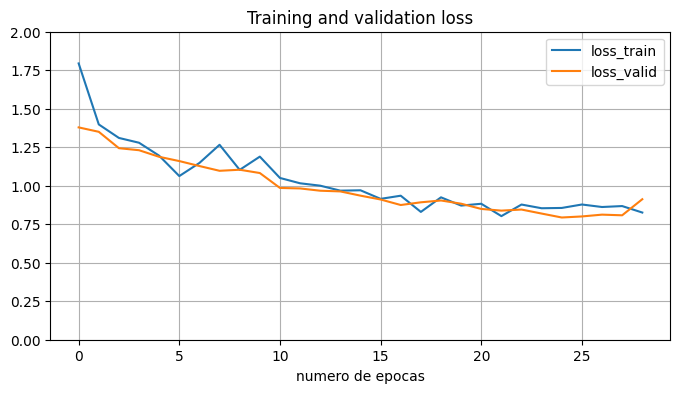

In [ ]:
pd.DataFrame({'loss_train': history_2.history['loss'],
              'loss_valid': history_2.history['val_loss']}).plot(figsize=(8,4))

plt.grid(True)
plt.ylim(0,2)
plt.xlabel('numero de epocas')
plt.title('Training and validation loss');

# c) Modelo 3: Transfer Learning (objetivo: accuracy_valid > 88%)

En nuestro problema de clasificación de flores, el utilizar CNNs diseñadas y entrenadas por nosotros mismos, aparece una barrera en las proximidades del 75-77% de precisión del modelo (siempre sobre validación).

Para superar este escollo, el siguiente paso natural es la utilización de modelos preentrenados. Existe una gran variedad de ellos basados en redes CNNs clásicas, donde la principal diferencia es que acumulan más capas que nuestros modelos 1 y 2. Adicionalmente, en estos modelos se han ido incorporando diferentes propuestas para mejorar la arquitectura de la CNN.

En general, utilizando estos modelos convolucionales preentrenados podemos alcanzar accuracies próximos al 90%. Normalmente, estos modelos han sido previamente entrenados sobre datasets de gran tamaño y con gran número de categorías. P.e. en subconjuntos de Imagenet (14 millones de imagenes de 22K categorías).

Dado que estos modelos se entrenaron para resolver un problema "relativamente" parecido a nuestro problema de clasificación, parece razonable pensar que podemos aprovechar ese conocimiento capturado en la red para resolver nuestro problema de clasificación de flores.



Para elegir el modelo preentrenado que debe utilizar cada grupo, proceda del siguiente modo:
* Paso 1: sume los DNIs de los componentes del grupo (si el grupo tiene un sólo miembro, vaya directamente al paso 2). res = dni_1 + dn_2
* Paso 2: Aplique la siguiente operación al resultado anterior: res mod 6.
* Paso 3: Tome el modelo cuyo número asociado coincide con el resultado de la operación anterior.
* Paso 4: El porcentaje que aparece entre paréntesis junto al nombre del modelo es el accuracy (en validación) que deberías poder alcanzar sin dificultad utilizando el modelo. En todos los casos considera un input_shape = (224, 224, 3).

  0. Resnet50 (>90%)
  https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50

  1. Resnet101 (>90%) input_shape = (224, 224, 3)
  https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/ResNet101

  2. VGG16 (>90%) input_shape = (224, 224, 3)
  https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16

  3. VGG19 (>90%) input_shape = (224, 224, 3) https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19/VGG19

  4. Xception (>88%) input_shape = (224, 224, 3) https://www.tensorflow.org/api_docs/python/tf/keras/applications/xception/Xception

  5. Inceptionv3 (>88%) input_shape = (224, 224, 3) https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3

P.e. si los DNIs de los alumnos son: 12345678 y 23456781. La suma es 35802459. De donde 35802459 mod 6 = 3. Por tanto, tomaríamos el modelo VGG16.

Recuerda que puedes utilizar el siguiente post como referencia del uso de transfer learning: https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/

**Tarea 14: Importa el modelo desde Tensorflow**

Dado que este modelo ha sido entrenado para clasificar entre 1.000 categorías, las capas densas finales del modelo no son útiles para nuestro problema de clasificación de 5 categorías (es lo que suele llamarse include_top = SI/NO). De manera que eliminamos lo que a veces se suele llamar el "top model". De este modo sólo nos quedamos con la parte que hace la funcionalidad de "procesamiento" de la imagen.

Utilizaremos Xception ya que sum_dni mod 6 = 4

In [ ]:
import tensorflow as tf

from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model

# Definicion del tamaño de la entrada
INPUT_SHAPE = (224, 224, 3)

# Cargar el modelo utilizando Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

base_model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

**Tarea 15: Personalizar el bloque de decisión**  
Añadimos una capa de flatten y tres nuevas capas densas especificas para nuestro problema con dimensiones 4096, 1072 y la que necesite la capa de salida (con sus correspondientes drop-outs).

In [ ]:
# Obtener la salida de la base convolucional del modelo pre-entrenado
x = base_model.output

# Añadir la capa Flatten
# Esta capa convierte la salida 3D (alto, ancho, canales) de la última capa convolucional
# en un vector 1D, lo que es necesario para alimentar las capas densas (fully connected).
x = Flatten()(x)

# Añadir la primera capa Dense con 512 neuronas y su Dropout
# Usamos 'relu' como función de activación
x = Dense(512, activation='relu')(x)
# El Dropout ayuda a prevenir el overfitting "apagando" aleatoriamente
# un porcentaje de neuronas durante el entrenamiento.
x = Dropout(0.5)(x) # Un valor común de dropout es 0.5 (50%)

# Añadir la segunda capa Dense con 128 neuronas y su Dropout
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Añadir la capa de salida (Dense final)
# La dimensión de esta capa debe ser igual al número de categorías de tus flores (5 en este caso).
# Para problemas de clasificación multi-clase (más de 2 categorías),
# se usa 'softmax' como función de activación, que devuelve probabilidades para cada clase.
NUM_CLASSES = 5 # Asumiendo 5 categorías de flores
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Construir el modelo completo
# Se define el modelo con la entrada de la base_model y la salida de nuestras nuevas capas.
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 72,308,525 (275.84 MB)

 Trainable params: 72,253,997 (275.63 MB)

 Non-trainable params: 54,528 (213.00 KB)

**Tarea 16: Congelar los pesos que no se vayan a entrenar**

Previo a hacer el denominado `Fine-Tuning` del modelo, indicaremos a Tensorflow que únicamente debe entrenar:

   * Las dos últimas capas convolucionales de la red preentrenada, de las que realizaremos un ajuste fino de los pesos.
   * Las tres capas densas que hemos incluido nuevas.

In [ ]:
print("Configurando la entrenabilidad de las capas de la base_model (Xception)...")

# Iteramos sobre cada capa en nuestra 'base_model'.
for layer in base_model.layers:
    # Por defecto, "congelamos" todas las capas de la base_model.
    layer.trainable = False
print("Todas las capas de la base_model han sido inicialmente congeladas.")

# Creamos una lista de capas de la base_model que realmente tienen pesos entrenables.
# Algunas capas (como las de activación o pooling) no tienen pesos, por lo que las excluimos.
trainable_layers_in_base_model = [layer for layer in base_model.layers if len(layer.weights) > 0]

# Definimos cuántas de las últimas capas entrenables de la base_model queremos "descongelar".
num_layers_to_unfreeze = 2

# Verificamos si tenemos suficientes capas entrenables para descongelar el número deseado.
if len(trainable_layers_in_base_model) >= num_layers_to_unfreeze:
    # Iteramos sobre las últimas 'num_layers_to_unfreeze' capas entrenables de la base_model.
    for layer in trainable_layers_in_base_model[-num_layers_to_unfreeze:]:
        # Establecemos 'trainable = True' para estas capas, permitiendo que sus pesos se actualicen.
        layer.trainable = True
        print(f"   -> Capa descongelada para entrenamiento: {layer.name}")
else:
    print(f"Advertencia: El número de capas a descongelar ({num_layers_to_unfreeze}) es mayor que las capas entrenables disponibles en la base_model ({len(trainable_layers_in_base_model)}).")

print("Configuración de entrenabilidad de la base_model completada.")

model.summary()

print("\nEstado de entrenabilidad detallado de las capas del modelo final:")
for layer in model.layers:
    print(f"{layer.name}: {layer.trainable}")

Configurando la entrenabilidad de las capas de la base_model (Xception)...
Todas las capas de la base_model han sido inicialmente congeladas.
  -> Capa descongelada para entrenamiento: block14_sepconv2
  -> Capa descongelada para entrenamiento: block14_sepconv2_bn
Configuración de entrenabilidad de la base_model completada.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 72,308,525 (275.84 MB)

 Trainable params: 54,610,693 (208.32 MB)

 Non-trainable params: 17,697,832 (67.51 MB)


Estado de entrenabilidad detallado de las capas del modelo final:
input_layer_2: False
block1_conv1: False
block1_conv1_bn: False
block1_conv1_act: False
block1_conv2: False
block1_conv2_bn: False
block1_conv2_act: False
block2_sepconv1: False
block2_sepconv1_bn: False
block2_sepconv2_act: False
block2_sepconv2: False
block2_sepconv2_bn: False
conv2d_6: False
block2_pool: False
batch_normalization: False
add: False
block3_sepconv1_act: False
block3_sepconv1: False
block3_sepconv1_bn: False
block3_sepconv2_act: False
block3_sepconv2: False
block3_sepconv2_bn: False
conv2d_7: False
block3_pool: False
batch_normalization_1: False
add_1: False
block4_sepconv1_act: False
block4_sepconv1: False
block4_sepconv1_bn: False
block4_sepconv2_act: False
block4_sepconv2: False
block4_sepconv2_bn: False
conv2d_8: False
block4_pool: False
batch_normalization_2: False
add_2: False
block5_sepconv1_act: False
block5_sepconv1: False
block5_sepconv1_bn: False
block5_sepconv2_act: False
block5_sepconv2: Fa

**Tarea 17: Crear los datagenerators oportunos**

Para ello:
> * Utiliza Data augmentation.  
> * Las imágenes tienen que ser preprocesadas igual que cuando se entrenó el modelo pre.entrenado original. Para ello se utiliza el parámetro `preprocessing_function=preprocess_input` (preprocess_input importado desde `keras.applications.xxxxxx` en ambos generators (train y valid). Por tanto, no hay que indicarle `rescale`. En caso de ser necesario, se encargará `preprocess_input`.  
> * Dado que estamos reutilizando un modelo que no "es nuestro", deberemos ceñirnos al tamaño de imagen que permite la red a la entrada. Recuerda que debe ser: 224x224.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
preprocess_input = xception_preprocess_input

print("Configurando Data Generators...")

# Parámetros comunes
IMAGE_SIZE = (224, 224) # Requerido por Xception
BATCH_SIZE = 32         # Un tamaño de batch común
NUM_CLASSES = 5         # Asumiendo 5 categorías de flores


# Creamos el Data Generator para el conjunto de entrenamiento
# Con Data Augmentation y el preprocesamiento específico de Xception
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input, # Usa la función de preprocesamiento de Xception
    rotation_range=20,                       # Rotación aleatoria (grados)
    width_shift_range=0.2,                   # Desplazamiento horizontal
    height_shift_range=0.2,                  # Desplazamiento vertical
    shear_range=0.2,                         # Sesgo aleatorio
    zoom_range=0.2,                          # Zoom aleatorio
    horizontal_flip=True,                    # Volteo horizontal aleatorio
    fill_mode='nearest'                      # Estrategia para rellenar píxeles nuevos
)

# Creamos el Data Generator para el conjunto de validación
valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Solo preprocesamiento
)

# Creamos los generadores de flujo de datos (flow_from_directory)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,       # Redimensiona todas las imágenes
    batch_size=BATCH_SIZE,
    class_mode='categorical',     # Para clasificación multi-clase (one-hot encoding)
    shuffle=True                  # Mezcla las imágenes para el entrenamiento
)

validation_generator = valid_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,       # Redimensiona todas las imágenes
    batch_size=BATCH_SIZE,
    class_mode='categorical',     # Para clasificación multi-clase
    shuffle=False                 # No es necesario mezclar para la validación
)

print("\nData Generators creados con éxito.")
print(f"Imágenes de entrenamiento encontradas: {train_generator.samples} pertenecientes a {train_generator.num_classes} clases.")
print(f"Imágenes de validación encontradas: {validation_generator.samples} pertenecientes a {validation_generator.num_classes} clases.")
print(f"Mapeo de clases (class_indices): {train_generator.class_indices}")

Configurando Data Generators...
Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.

Data Generators creados con éxito.
Imágenes de entrenamiento encontradas: 2935 pertenecientes a 5 clases.
Imágenes de validación encontradas: 735 pertenecientes a 5 clases.
Mapeo de clases (class_indices): {'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


**Tarea 18: Haz el fine-tuning del modelo con el objetivo de alcanzar un accuracy (sobre el conjunto de validación > 88%).**

A la hora de entrenar un modelo pretrained es típico bajar el learning rate respecto al que utilizaríamos para un modelo nuestro desde cero.

Iniciando el Fine-Tuning del modelo Xception...
Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.5578 - loss: 1.3122
Epoch 1: val_accuracy improved from -inf to 0.83665, saving model to ./checkpoints/best_xception_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 55s 609ms/step - accuracy: 0.5588 - loss: 1.3090 - val_accuracy: 0.8366 - val_loss: 0.4357
Epoch 2/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 16s 178ms/step - accuracy: 0.5938 - loss: 1.1712
Epoch 2: val_accuracy improved from 0.83665 to 0.83949, saving model to ./checkpoints/best_xception_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.5938 - loss: 1.1712 - val_accuracy: 0.8395 - val_loss: 0.4296
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.7359 - loss: 0.7630
Epoch 3: val_accuracy improved from 0.83949 to 0.85653, saving model to ./checkpoints/best_xception_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 90s 772ms/step - accuracy: 0.7361 - loss: 0.7626 - val_accuracy: 0.8565 - val_loss: 0.3870
Epoch 4/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - accuracy: 0.9062 - loss: 0.3172
Epoch 4: val_accuracy did not improve from 0.85653
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9062 - loss: 0.3172 - val_accuracy: 0.8551 - val_loss: 0.3892
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.7879 - loss: 0.5830
Epoch 5: val_accuracy did not improve from 0.85653
91/91 ━━━━━━━━━━━━━━━━━━━━ 41s 454ms/step - accuracy: 0.7879 - loss: 0.5831 - val_accuracy: 0.8466 - val_loss: 0.3797
Epoch 6/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.9062 - loss: 0.2399
Epoch 6: val_accuracy did not improve from 0.85653
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9062 - loss: 0.2399 - val_accuracy: 0.8523 - val_loss: 0.3785
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.8080 - loss: 0.5287
Epoch 7: val_accuracy improved fr

91/91 ━━━━━━━━━━━━━━━━━━━━ 52s 566ms/step - accuracy: 0.8081 - loss: 0.5286 - val_accuracy: 0.8622 - val_loss: 0.3755
Epoch 8/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 15s 167ms/step - accuracy: 0.7812 - loss: 0.8448
Epoch 8: val_accuracy improved from 0.86222 to 0.86364, saving model to ./checkpoints/best_xception_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.7812 - loss: 0.8448 - val_accuracy: 0.8636 - val_loss: 0.3710
Epoch 9/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.8214 - loss: 0.5270
Epoch 9: val_accuracy improved from 0.86364 to 0.86790, saving model to ./checkpoints/best_xception_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 85s 934ms/step - accuracy: 0.8215 - loss: 0.5266 - val_accuracy: 0.8679 - val_loss: 0.3262
Epoch 10/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 16s 178ms/step - accuracy: 0.9062 - loss: 0.3621
Epoch 10: val_accuracy improved from 0.86790 to 0.87074, saving model to ./checkpoints/best_xception_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.9062 - loss: 0.3621 - val_accuracy: 0.8707 - val_loss: 0.3272
Epoch 11/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.8519 - loss: 0.4145
Epoch 11: val_accuracy did not improve from 0.87074
91/91 ━━━━━━━━━━━━━━━━━━━━ 85s 455ms/step - accuracy: 0.8518 - loss: 0.4148 - val_accuracy: 0.8679 - val_loss: 0.3174
Epoch 12/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.9375 - loss: 0.2969
Epoch 12: val_accuracy did not improve from 0.87074
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9375 - loss: 0.2969 - val_accuracy: 0.8679 - val_loss: 0.3178
Epoch 13/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.8558 - loss: 0.3867
Epoch 13: val_accuracy improved from 0.87074 to 0.88210, saving model to ./checkpoints/best_xception_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 52s 572ms/step - accuracy: 0.8559 - loss: 0.3867 - val_accuracy: 0.8821 - val_loss: 0.3122
Epoch 14/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - accuracy: 0.9062 - loss: 0.2460
Epoch 14: val_accuracy improved from 0.88210 to 0.88352, saving model to ./checkpoints/best_xception_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 17s 189ms/step - accuracy: 0.9062 - loss: 0.2460 - val_accuracy: 0.8835 - val_loss: 0.3120
Epoch 15/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.8802 - loss: 0.3438
Epoch 15: val_accuracy did not improve from 0.88352
91/91 ━━━━━━━━━━━━━━━━━━━━ 75s 682ms/step - accuracy: 0.8802 - loss: 0.3440 - val_accuracy: 0.8821 - val_loss: 0.3096
Epoch 16/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.9062 - loss: 0.2689
Epoch 16: val_accuracy did not improve from 0.88352
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9062 - loss: 0.2689 - val_accuracy: 0.8821 - val_loss: 0.3085
Epoch 17/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.8713 - loss: 0.3440
Epoch 17: val_accuracy improved from 0.88352 to 0.88920, saving model to ./checkpoints/best_xception_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 54s 595ms/step - accuracy: 0.8714 - loss: 0.3440 - val_accuracy: 0.8892 - val_loss: 0.3021
Epoch 18/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - accuracy: 0.7812 - loss: 0.5739
Epoch 18: val_accuracy did not improve from 0.88920
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7812 - loss: 0.5739 - val_accuracy: 0.8849 - val_loss: 0.3010
Epoch 19/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.9021 - loss: 0.2837
Epoch 19: val_accuracy improved from 0.88920 to 0.89631, saving model to ./checkpoints/best_xception_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 94s 759ms/step - accuracy: 0.9020 - loss: 0.2840 - val_accuracy: 0.8963 - val_loss: 0.2990
Epoch 20/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - accuracy: 0.8438 - loss: 0.4177
Epoch 20: val_accuracy did not improve from 0.89631
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8438 - loss: 0.4177 - val_accuracy: 0.8963 - val_loss: 0.2988
Epoch 21/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.8921 - loss: 0.3094
Epoch 21: val_accuracy improved from 0.89631 to 0.90341, saving model to ./checkpoints/best_xception_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 93s 919ms/step - accuracy: 0.8921 - loss: 0.3092 - val_accuracy: 0.9034 - val_loss: 0.2987
Epoch 22/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.8750 - loss: 0.2831
Epoch 22: val_accuracy did not improve from 0.90341
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8750 - loss: 0.2831 - val_accuracy: 0.9020 - val_loss: 0.2986
Epoch 23/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9106 - loss: 0.2635
Epoch 23: val_accuracy did not improve from 0.90341
91/91 ━━━━━━━━━━━━━━━━━━━━ 97s 455ms/step - accuracy: 0.9106 - loss: 0.2633 - val_accuracy: 0.8864 - val_loss: 0.3251
Epoch 24/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9062 - loss: 0.1978
Epoch 24: val_accuracy did not improve from 0.90341
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9062 - loss: 0.1978 - val_accuracy: 0.8878 - val_loss: 0.3244
Epoch 25/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9058 - loss: 0.2772
Epoch 25: val_accuracy imp

91/91 ━━━━━━━━━━━━━━━━━━━━ 53s 581ms/step - accuracy: 0.9059 - loss: 0.2771 - val_accuracy: 0.9091 - val_loss: 0.3063
Epoch 26/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - accuracy: 0.9062 - loss: 0.5719
Epoch 26: val_accuracy did not improve from 0.90909
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9062 - loss: 0.5719 - val_accuracy: 0.9077 - val_loss: 0.3071
Epoch 27/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.9076 - loss: 0.2705
Epoch 27: val_accuracy did not improve from 0.90909
91/91 ━━━━━━━━━━━━━━━━━━━━ 42s 463ms/step - accuracy: 0.9077 - loss: 0.2703 - val_accuracy: 0.8793 - val_loss: 0.3411
Epoch 28/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9375 - loss: 0.1191
Epoch 28: val_accuracy did not improve from 0.90909
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9375 - loss: 0.1191 - val_accuracy: 0.8793 - val_loss: 0.3430
Epoch 29/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.9357 - loss: 0.2052
Epoch 29: val_accuracy did

Precisión final en el conjunto de validación: 0.9091


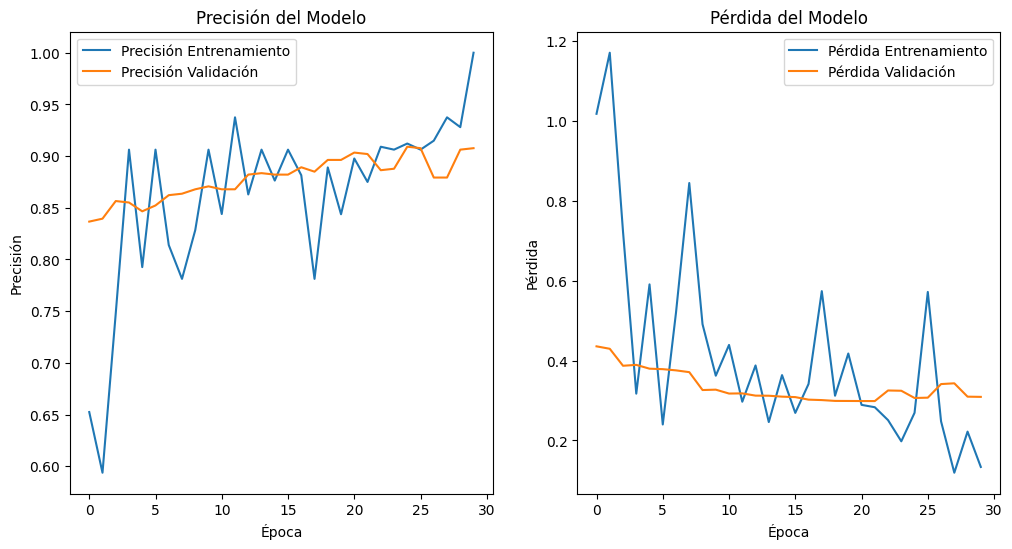

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings
warnings.filterwarnings('ignore')


print("Iniciando el Fine-Tuning del modelo Xception...")

# Parámetros de entrenamiento
EPOCHS = 30          # Número máximo de épocas. Puedes ajustarlo.
                     # El EarlyStopping debería detener el entrenamiento antes si no hay mejora.
INITIAL_EPOCH = 0    # Desde qué época empezar (0 si es un entrenamiento nuevo)

# ModelCheckpoint: Guarda el mejor modelo (según la precisión de validación)
checkpoint_filepath = './checkpoints/best_xception_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,               # Guarda solo el "mejor" modelo
    monitor='val_accuracy',            # Monitorea la precisión de validación
    mode='max',                        # Para buscar la precisión más alta
    save_weights_only=False,           # Guarda el modelo completo (arquitectura + pesos)
    verbose=1                          # Muestra mensajes
)

# EarlyStopping: Detiene el entrenamiento si la precisión de validación no mejora
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',            # Monitorea la precisión de validación
    patience=10,                       # Detiene si no hay mejora en 10 épocas
    mode='max',                        # Para buscar la precisión más alta
    restore_best_weights=True,         # Restaura los pesos del mejor modelo
    verbose=1                          # Muestra mensajes
)

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size, # Número de batches por época
    epochs=EPOCHS,
    initial_epoch=INITIAL_EPOCH,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size, # Número de batches por validación
    callbacks=[model_checkpoint_callback, early_stopping_callback]
)

print("\nFine-Tuning completado.")

# Evaluar el modelo final
# Carga el mejor modelo guardado por ModelCheckpoint
model = tf.keras.models.load_model(checkpoint_filepath)

# Evalúa el modelo en el conjunto de validación
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size, verbose=0)
print(f"Precisión final en el conjunto de validación: {accuracy:.4f}")

# Graficar el historial de entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del Modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida del Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(loc='upper right')

plt.show()